# SIR toy model

***

In [4]:
import requests
import random
import networkx as nx
import matplotlib.pyplot as plt

***

## Exercise 20.4 from SNA

Implement an SIR model on the networks at `http://www.networkatlas.eu/exercises/20/1/data.txt` and `http://www.networkatlas.eu/exercises/20/2/data.txt`. 
Run it multiple times with $\beta=0.2$ and different $\mu$ values: 0.01, 0.02, 0.04. Plot the ratio of **removed** nodes. 

In [45]:
# define parameters
beta = 0.2
mus = [0.05, 0.1, 0.2]

def run_SIR(
    nw,
    mus=[0.01, 0.02, 0.04],
    beta=0.2,
    maxtime=200,
    seed=1312,
    M=10
):
    '''
    nw is one of: 1 (power law), 2 (Gnp)
    mus is a list of mu values to try
    '''

    # make network
    url = f"https://www.networkatlas.eu/exercises/20/{nw}/data.txt"
    data = requests.get(url).text
    data = data.split("\n")
    data = data[:-1]
    edgelist = [[int(x) for x in edge.split("\t")] for edge in data]
    nodelist = list(set([node for edge in edgelist for node in edge]))

    G_orig = nx.Graph()
    G_orig.add_edges_from(edgelist)

    assert len([c for c in nx.connected_components(G_orig)]) == 1 , "More than 1 component!"
    assert all([edge==sorted(edge) for edge in edgelist]), "Edges in different directions!"

    # initiate dictionary of node neighbours
    d = {}
    for edge in edgelist:
        for node in edge:
            if not node in d:
                d[node] = []
        d[edge[0]].append(edge[1])
        d[edge[1]].append(edge[0])
    # now d contains key: value pairs; key = node id, value = list of node's neighbours

    # set parameters
    N = len(nodelist)
    random.seed(seed)

    # manual implementation
    ratios = {}

    for mu in mus:

        # initiate dictionary keeping track of runs
        runs = {}
        
        ratios[mu] = {}

        for run in range(M):
            
            # initiate ratios
            ratios[mu][run] = {}

            # start clock
            time = 0
            susceptible = nodelist.copy()
            infected = []
            recovered = []

            i_ratios = []
            s_ratios = []
            r_ratios = []


            # at t0, 
            # infect patient zero
            patient_zero = random.choice(nodelist)
            
            # update neighbours, infected, and ratios
            susceptible.remove(patient_zero)
            infected.append(patient_zero)

            i_ratios.append(round(len(set(infected)) / N, 6))
            r_ratios.append(round(len(set(recovered)) / N, 6))
            s_ratios.append(round(len(set(susceptible)) / N, 6))

            time += 1

            # at each timestep,
            while time < maxtime:

                # recover - with parameter mu
                for node in infected:
                    if random.uniform(0,1) < mu:
                        recovered.append(node)
                infected = list(set(infected).difference(set(recovered)))

                # infect - with parameter beta
                new_infections = []

                # for each node that remains in SUSCEPTIBLE, check number of infected neighbours
                for node in susceptible:
                    nin = len(
                        set(d[node]).intersection(set(infected))
                    )
                    if nin:
                        if random.uniform(0,1) < beta * nin:
                            susceptible.remove(node)
                            new_infections.append(node)
                # add infected at timestep t
                if new_infections:
                    infected += new_infections
                    infected = list(set(infected)) #... and deduplify

                i_ratios.append(round(len(set(infected)) / N, 6))
                r_ratios.append(round(len(set(recovered)) / N, 6))
                s_ratios.append(round(len(set(susceptible)) / N, 6))

                if len(set(infected))==N:
                    print(f"b={beta}, run={run} All nodes infected at timestep {time}")
                    break
                elif len(set(recovered))==N:
                    print(f"b={beta}, run={run} All nodes recovered at timestep {time}")
                    break
                else:
                    pass

                time +=1

            ratios[mu][run]["i"] = i_ratios
            ratios[mu][run]["r"] = r_ratios
            ratios[mu][run]["s"] = s_ratios

            print(f"Run = {run}, mu = {mu}, steps = {time}")
    
    return ratios

In [46]:
ratios1 = run_SIR(1)

Run = 0, mu = 0.01, steps = 200
Run = 1, mu = 0.01, steps = 200
Run = 2, mu = 0.01, steps = 200
Run = 3, mu = 0.01, steps = 200
Run = 4, mu = 0.01, steps = 200
Run = 5, mu = 0.01, steps = 200
Run = 6, mu = 0.01, steps = 200
Run = 7, mu = 0.01, steps = 200
Run = 8, mu = 0.01, steps = 200
Run = 9, mu = 0.01, steps = 200
Run = 0, mu = 0.02, steps = 200
Run = 1, mu = 0.02, steps = 200
Run = 2, mu = 0.02, steps = 200
Run = 3, mu = 0.02, steps = 200
Run = 4, mu = 0.02, steps = 200
Run = 5, mu = 0.02, steps = 200
Run = 6, mu = 0.02, steps = 200
Run = 7, mu = 0.02, steps = 200
Run = 8, mu = 0.02, steps = 200
Run = 9, mu = 0.02, steps = 200
Run = 0, mu = 0.04, steps = 200
Run = 1, mu = 0.04, steps = 200
Run = 2, mu = 0.04, steps = 200
Run = 3, mu = 0.04, steps = 200
Run = 4, mu = 0.04, steps = 200
Run = 5, mu = 0.04, steps = 200
Run = 6, mu = 0.04, steps = 200
Run = 7, mu = 0.04, steps = 200
Run = 8, mu = 0.04, steps = 200
Run = 9, mu = 0.04, steps = 200


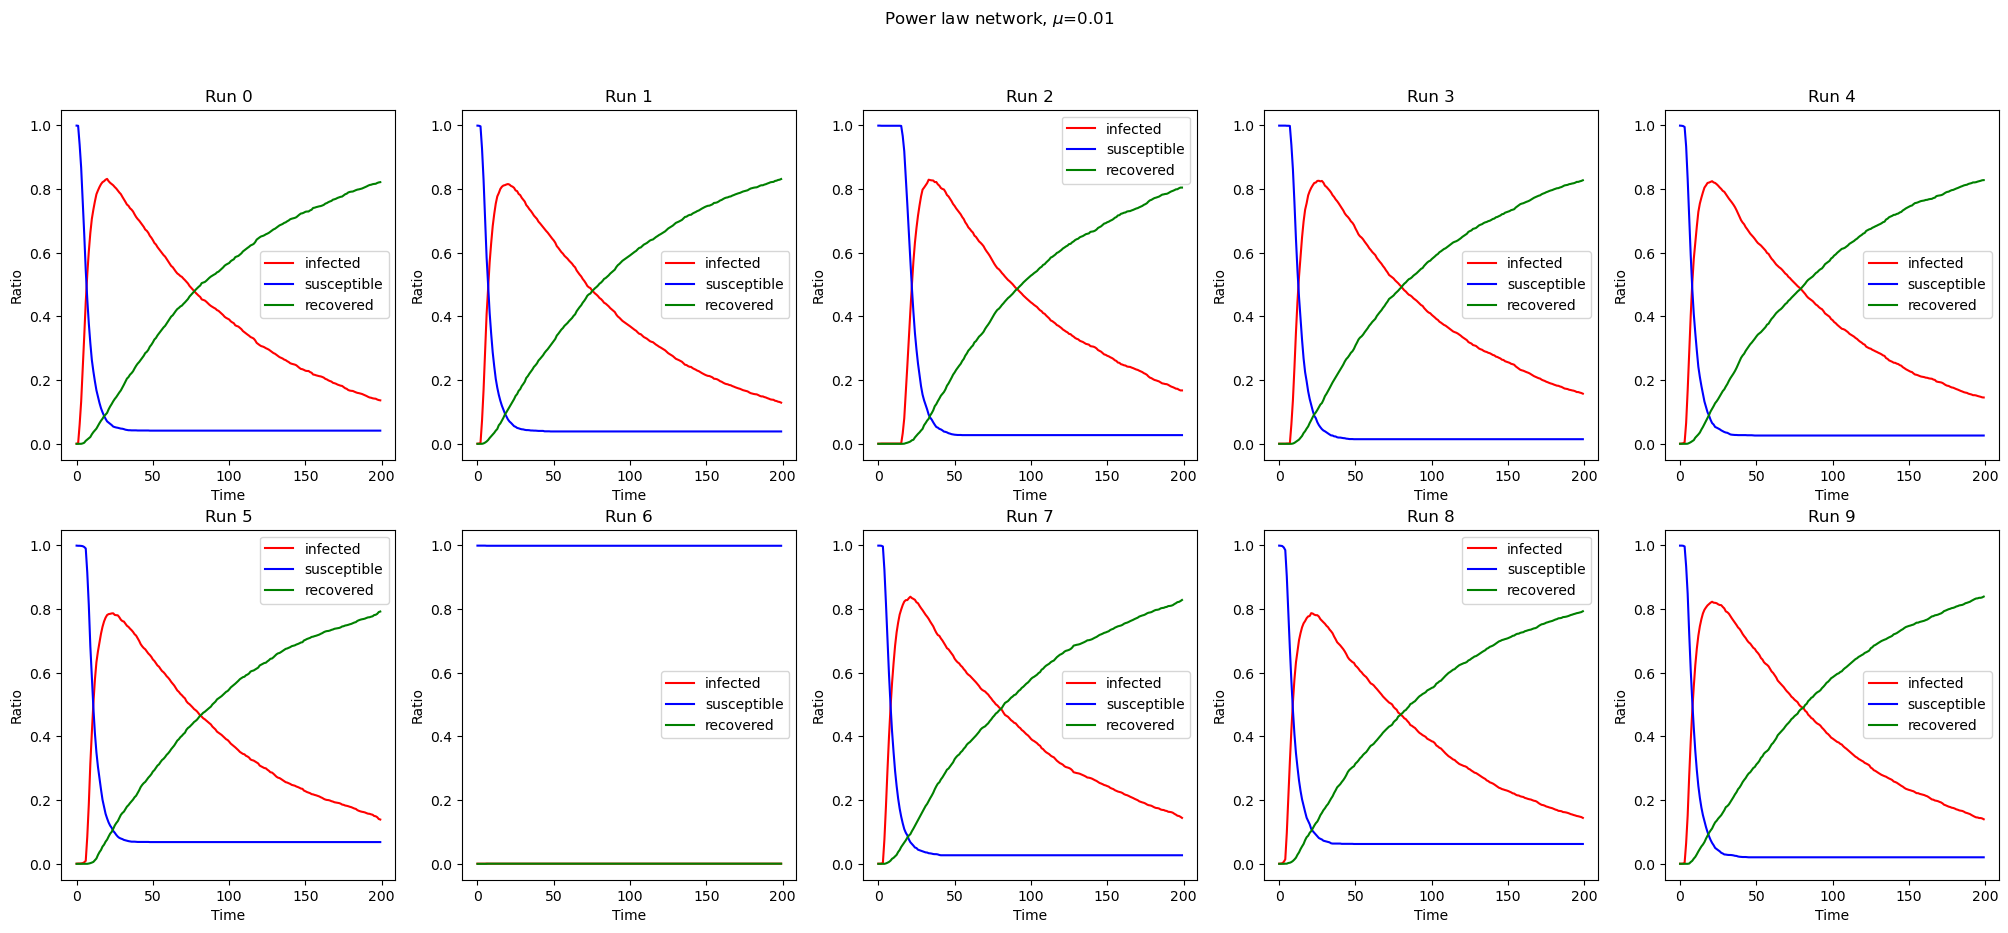

In [47]:
fig, axs = plt.subplots(2,5, figsize=(25,10))

mu = 0.01
i = 0

for _, ax in enumerate(axs):
    for _, a in enumerate(ax):
        a.plot(
            ratios1[0.01][i]["i"],
            label = "infected",
            color = "red"
        )
        a.plot(
            ratios1[0.01][i]["s"],
            label = "susceptible",
            color = "blue"
        )
        a.plot(
            ratios1[0.01][i]["r"],
            label = "recovered",
            color = "green"
        )
        a.set_title(f"Run {i}")
        a.set_xlabel("Time")
        a.set_ylabel("Ratio")
        a.legend()

        i += 1
plt.suptitle(f"Power law network, $\\mu$={mu}")
# for 
# for i in range(10):


#     for k, v in ratios1[float(mu)].values(): # these are dicts, one per each run
#         ax.plot(
#             v["i"],
#             color = "red",
#             label = "infected"
#         )
#     #ax.legend()
#     ax.set_xlabel("Timestep")
#     ax.set_ylabel("Ratio of infected nodes")
#     ax.set_title(f"SIS model with $\\beta$={beta}, $\\mu$={mu}")

# plt.suptitle("Power law network")

plt.show()

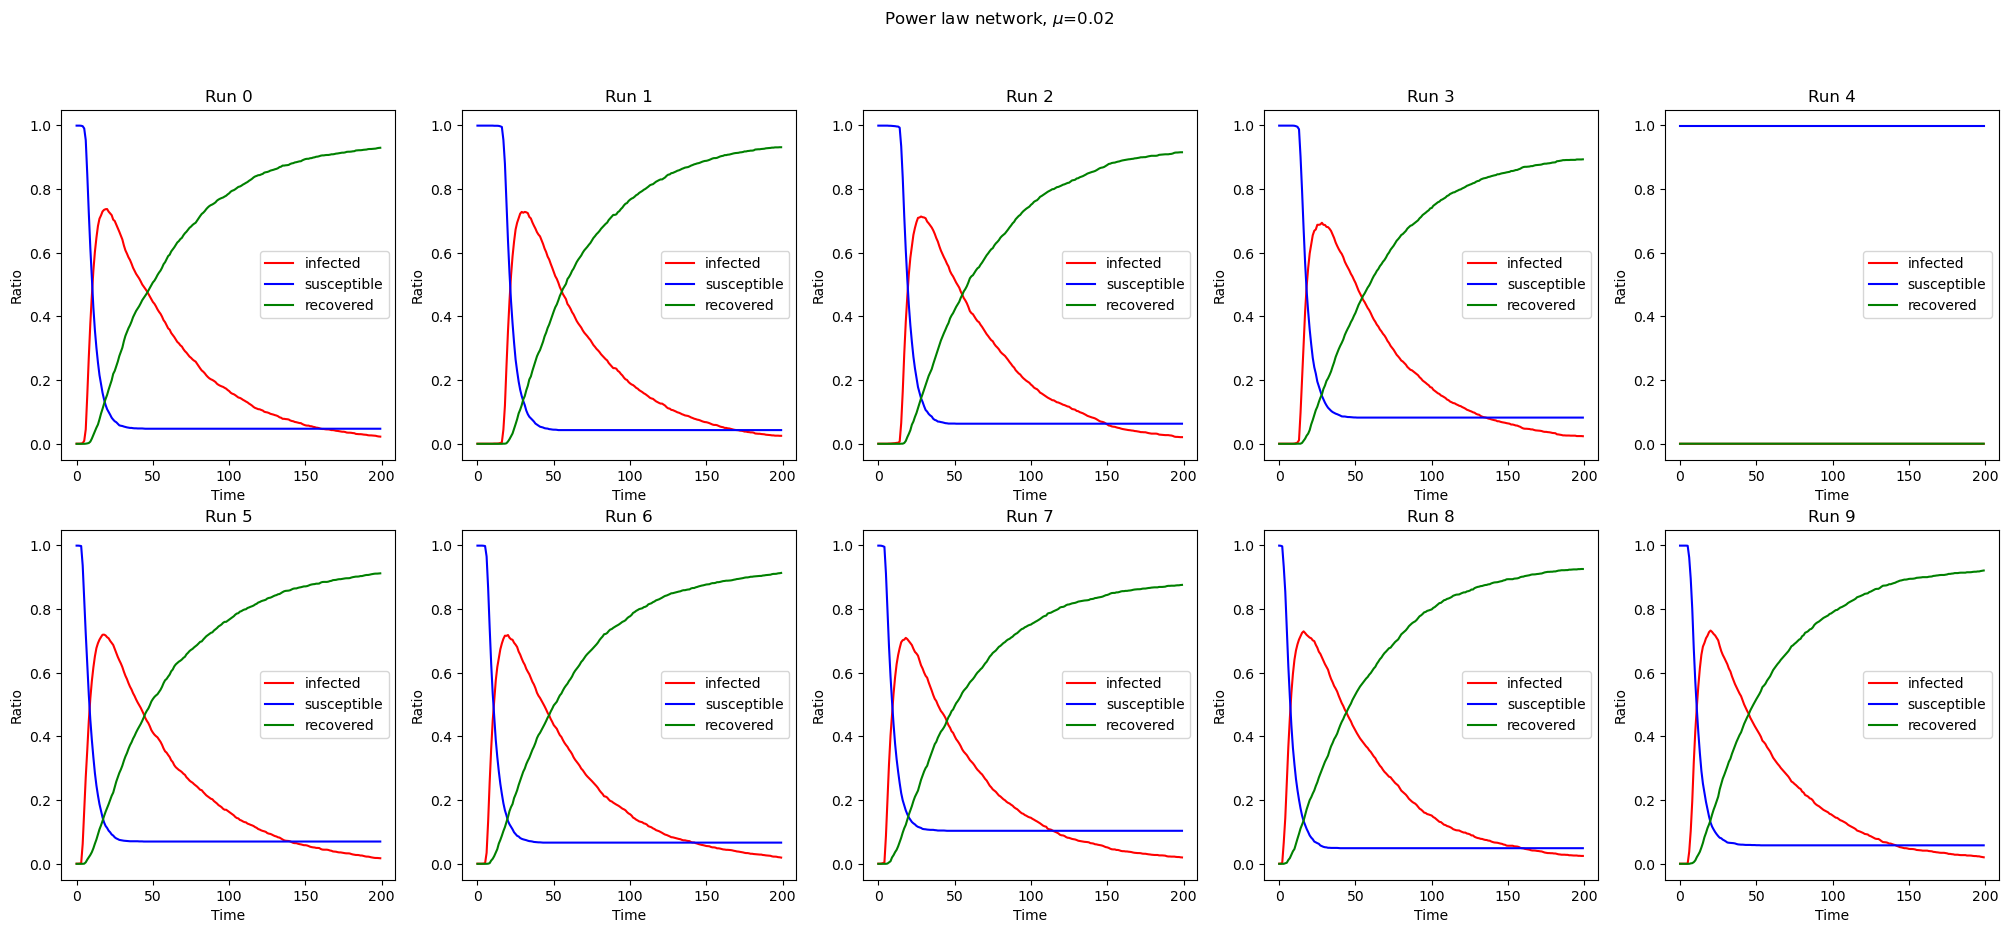

In [48]:
fig, axs = plt.subplots(2,5, figsize=(25,10))

mu = 0.02
i = 0

for _, ax in enumerate(axs):
    for _, a in enumerate(ax):
        a.plot(
            ratios1[0.02][i]["i"],
            label = "infected",
            color = "red"
        )
        a.plot(
            ratios1[0.02][i]["s"],
            label = "susceptible",
            color = "blue"
        )
        a.plot(
            ratios1[0.02][i]["r"],
            label = "recovered",
            color = "green"
        )
        a.set_title(f"Run {i}")
        a.set_xlabel("Time")
        a.set_ylabel("Ratio")
        a.legend()

        i += 1
plt.suptitle(f"Power law network, $\\mu$={mu}")

plt.show()

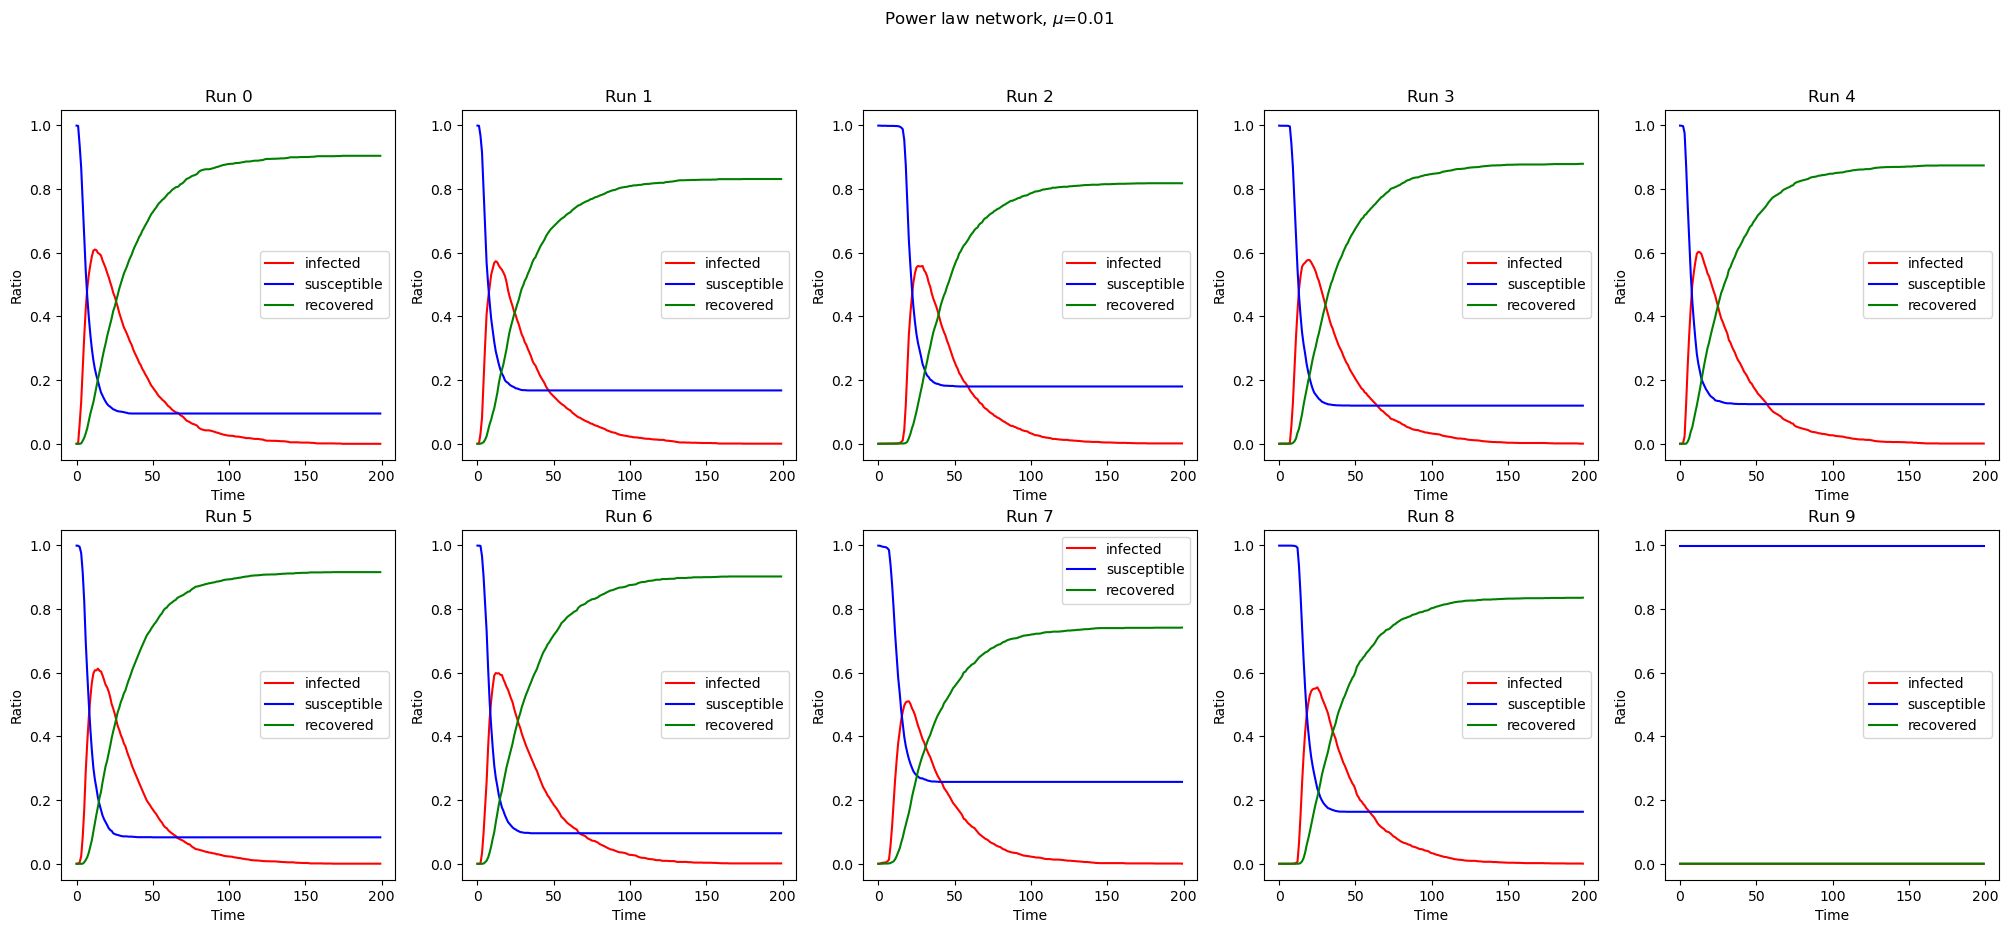

In [49]:
fig, axs = plt.subplots(2,5, figsize=(25,10))

mu = 0.01
i = 0

for _, ax in enumerate(axs):
    for _, a in enumerate(ax):
        a.plot(
            ratios1[0.04][i]["i"],
            label = "infected",
            color = "red"
        )
        a.plot(
            ratios1[0.04][i]["s"],
            label = "susceptible",
            color = "blue"
        )
        a.plot(
            ratios1[0.04][i]["r"],
            label = "recovered",
            color = "green"
        )
        a.set_title(f"Run {i}")
        a.set_xlabel("Time")
        a.set_ylabel("Ratio")
        a.legend()

        i += 1
plt.suptitle(f"Power law network, $\\mu$={mu}")
# for 
# for i in range(10):


#     for k, v in ratios1[float(mu)].values(): # these are dicts, one per each run
#         ax.plot(
#             v["i"],
#             color = "red",
#             label = "infected"
#         )
#     #ax.legend()
#     ax.set_xlabel("Timestep")
#     ax.set_ylabel("Ratio of infected nodes")
#     ax.set_title(f"SIS model with $\\beta$={beta}, $\\mu$={mu}")

# plt.suptitle("Power law network")

plt.show()